In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
sns.set(style="white",color_codes=True)

In [2]:
HouseDS=pd.read_csv("HousePS.csv")
HouseDS.head()

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Views,Area,Road,Road Width,Road Type,Amenities
0,Flat System House On Sale At Budhanikantha : H...,"Budhanikantha, Budhanilkantha, Kathmandu",Kathmandu,90000000.0,6,3,2.0,10,17,1-0-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
1,21 Aana Beautiful House : House For Sale In Bu...,"Pasikot, Budhanilkantha, Kathmandu",Kathmandu,80000000.0,5,3,2.0,9,26,0-21-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,"['Parking', 'Garage', 'Fencing', 'Frontyard', ..."
2,Beautiful To Floor House : House For Sale In D...,"Dhapasi, Dhapasi, Kathmandu",Kathmandu,70000000.0,5,3,2.0,12,154,1-1-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
3,Modern Architecture Bungalow House : House For...,"baluwatar, Baluwatar, Kathmandu",Kathmandu,130000000.0,6,4,3.0,9,17,0-10-1-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
4,Modern Bungalow House : House For Sale In Golf...,"Golfutar, Golfutar, Kathmandu",Kathmandu,100000000.0,6,3,2.0,10,59,0-19-2-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Balcony', 'Back..."


In [3]:
HouseDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       2211 non-null   object 
 1   Address     2211 non-null   object 
 2   City        2211 non-null   object 
 3   Price       2211 non-null   float64
 4   Bedroom     2211 non-null   int64  
 5   Bathroom    2211 non-null   int64  
 6   Floors      2211 non-null   float64
 7   Parking     2211 non-null   int64  
 8   Views       2211 non-null   int64  
 9   Area        2211 non-null   object 
 10  Road        2211 non-null   object 
 11  Road Width  2211 non-null   object 
 12  Road Type   1426 non-null   object 
 13  Amenities   2211 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 242.0+ KB


In [4]:
#Filtering the Address
Filter_Address= [item.split(",")[1].strip() for sublist in [HouseDS['Address']] for item in sublist]
print(len(Filter_Address))       

2211


In [6]:
def parse_road_width(x):
    qty,measure=x.split(' ')[0],x.split(' ')[1]
    if measure =='Feet':
        return float(qty)*0.3048
    return float(qty)
HouseDS['road_width_meters']=HouseDS['Road Width'].astype('str').apply(parse_road_width)
del HouseDS['Road Width']
del HouseDS['Views']
del HouseDS['Title']

In [7]:
#LabelEncoding to convert String value to Numeric value
le = LabelEncoder()
HouseDS['City'] = le.fit_transform(HouseDS['City'])
HouseDS['Address'] = le.fit_transform(HouseDS['Address'])
HouseDS['Road Type'] = le.fit_transform(HouseDS['Road Type'])
HouseDS[0:1000:10]

,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Area,Road,Road Type,Amenities,road_width_meters
0,209,17,90000000.0,6,3,2.0,10,1-0-0-0 Aana,20 Feet / Blacktopped,1,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe...",6.0960
10,20,27,32000000.0,4,5,3.0,3,14 Aana,15 Feet / Blacktopped,1,"['Parking', 'Backyard']",4.5720
20,1271,3,20500000.0,7,3,3.0,1,0-3-2-0 Aana,10 Feet / Gravelled,3,"['Lawn', 'Balcony', 'Fencing', 'TV Cable', 'Wi...",3.0480
30,193,20,21000000.0,4,3,2.5,1,0-3-2-0 Aana,13 Feet / Gravelled,3,"['Balcony', 'Fencing', 'Modular Kitchen', 'TV ...",3.9624
40,791,17,60000000.0,6,6,3.0,4,11 Aana,15 Feet / Soil Stabilized,5,['Parking'],4.5720
...,...,...,...,...,...,...,...,...,...,...,...,...
950,70,20,45000.0,3,3,3.0,1,0-2-2-0 Aana,16 Feet / Gravelled,3,"['Garage', 'Fencing', 'Drainage', 'Water Suppl...",4.8768
960,626,17,12000000.0,1,1,1.0,1,0-2-2-3 Aana,10 Feet / Gravelled,3,"['Garage', 'Fencing', 'Frontyard', 'Wifi', 'Wa...",3.0480
970,1511,17,17000000.0,0,0,3.0,0,0-3-0-0 Aana,10 Feet / Gravelled,3,[],3.0480
980,1206,17,44000000.0,5,6,3.0,1,4 Aana,15 Feet / Blacktopped,1,"['Water Tank', 'Water Supply', 'Solar Water', ...",4.5720


In [8]:
#Sorting value of price in Descending order,Higher Price appears first 
HouseDS=HouseDS.sort_values(by=['Price'],ascending=False)

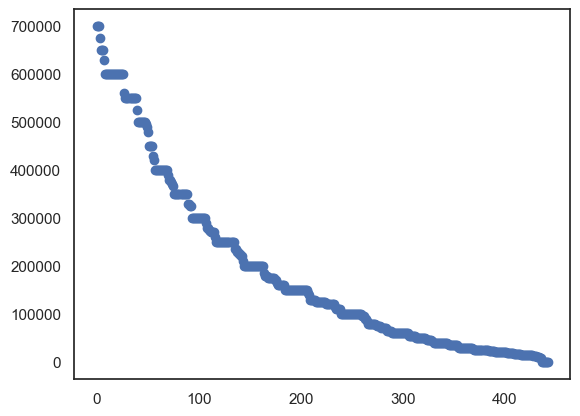

In [9]:
#Scatter plot with excluding top 20% price
exclude_top=int(0.8*len(HouseDS.Price))
plt.scatter(np.arange(0,len(HouseDS.Price[exclude_top:])),HouseDS.Price[exclude_top:])

In [10]:
#splitting Data set into Training and testing sets
X=HouseDS.drop(['Price','Area','Road','Amenities'],axis=1)
y=HouseDS['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

array([[<Axes: title={'center': 'Address'}>,
        <Axes: title={'center': 'City'}>,
        <Axes: title={'center': 'Bedroom'}>],
       [<Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Floors'}>,
        <Axes: title={'center': 'Parking'}>],
       [<Axes: title={'center': 'Road Type'}>,
        <Axes: title={'center': 'road_width_meters'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

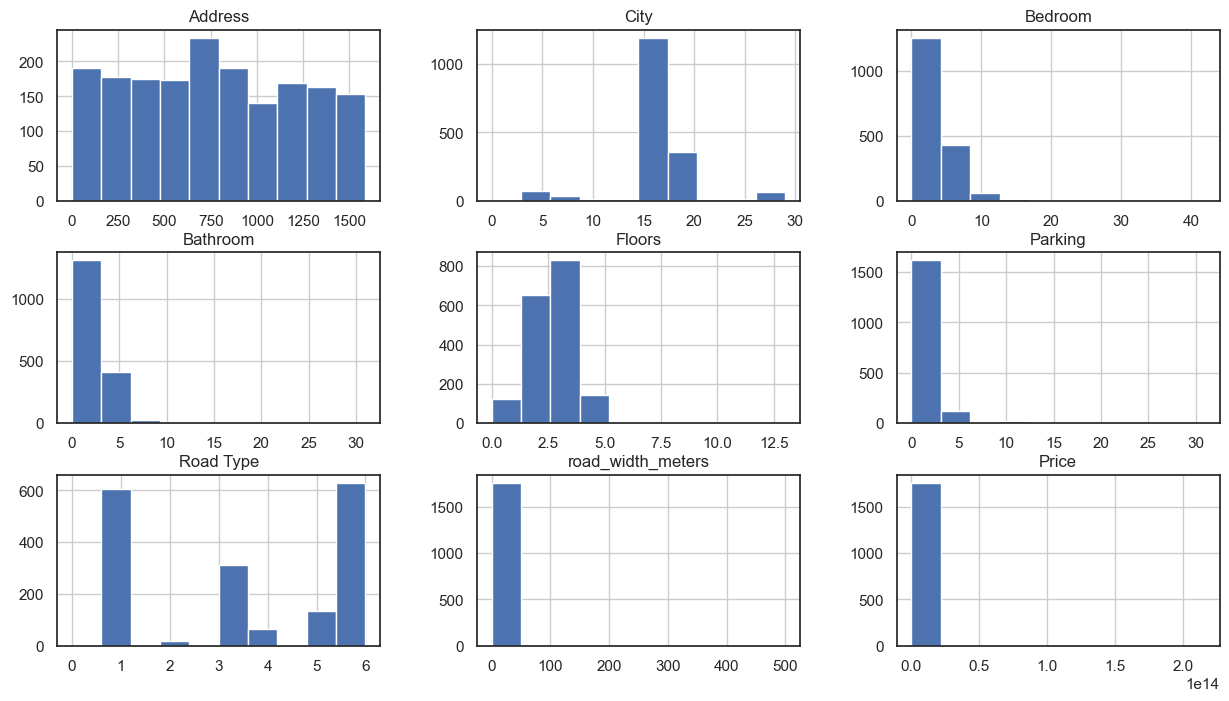

In [11]:
train_data=X_train.join(y_train)
train_data.hist(figsize=(15,8))

In [12]:
#plt.figure(figsize=(15,8))
#sns.heatmap(train_data.corr(),annot=True,cmap="YlGrBu")
#train_data.corr()

In [13]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1768, 8) (443, 8) (1768,) (443,)


In [14]:
#feature scaling(to normalize feature variables)
#np.random.seed(42)with_mean=False
scaler = StandardScaler()
#X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2,random_state=1)
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

In [15]:
svm_model=SVR(kernel='linear')

In [16]:
#Training the model
svm_model.fit(X_train_scale,y_train)

SVR(kernel='linear')

In [17]:
#Making predictions on test set

pred=svm_model.predict(X_test_scale)

In [18]:
#Evaluating the model
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

In [19]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 5.18826927644146e+25
Root Mean Squared Error (RMSE): 7202964165148.581
R-squared (R2): -0.004275250565578315


In [ ]:
#data->(Bedroom,Bathroom,Floors,ParkingSpace,Views(Visually Attractive),City,Address)
def House_requirement():
    No_of_Bedroom=int(input("Enter Number of bedrooms: "))
    No_of_Bathroom=int(input("Enter Number of bathrooms: "))
    No_of_Floors=float(input("Enter Number of floors: "))
    No_of_Parking=int(input("Enter Number of Parking Space: "))
    #Address=input("Enter the address of house: ")
    #City=input("Enter the City of house located: ")
    new_house=[[No_of_Bedroom,No_of_Bathroom,No_of_Floors,No_of_Parking,No_of_views]]
    new_house_scale=scaler.transform(new_house)
    pred_price=svm_model.predict(new_house_scale)
    print("Your Predicted Price is ",pred_price)
House_requirement()